# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#LEITURA DO ARQUIVO CSV
df = pd.read_csv('/content/previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


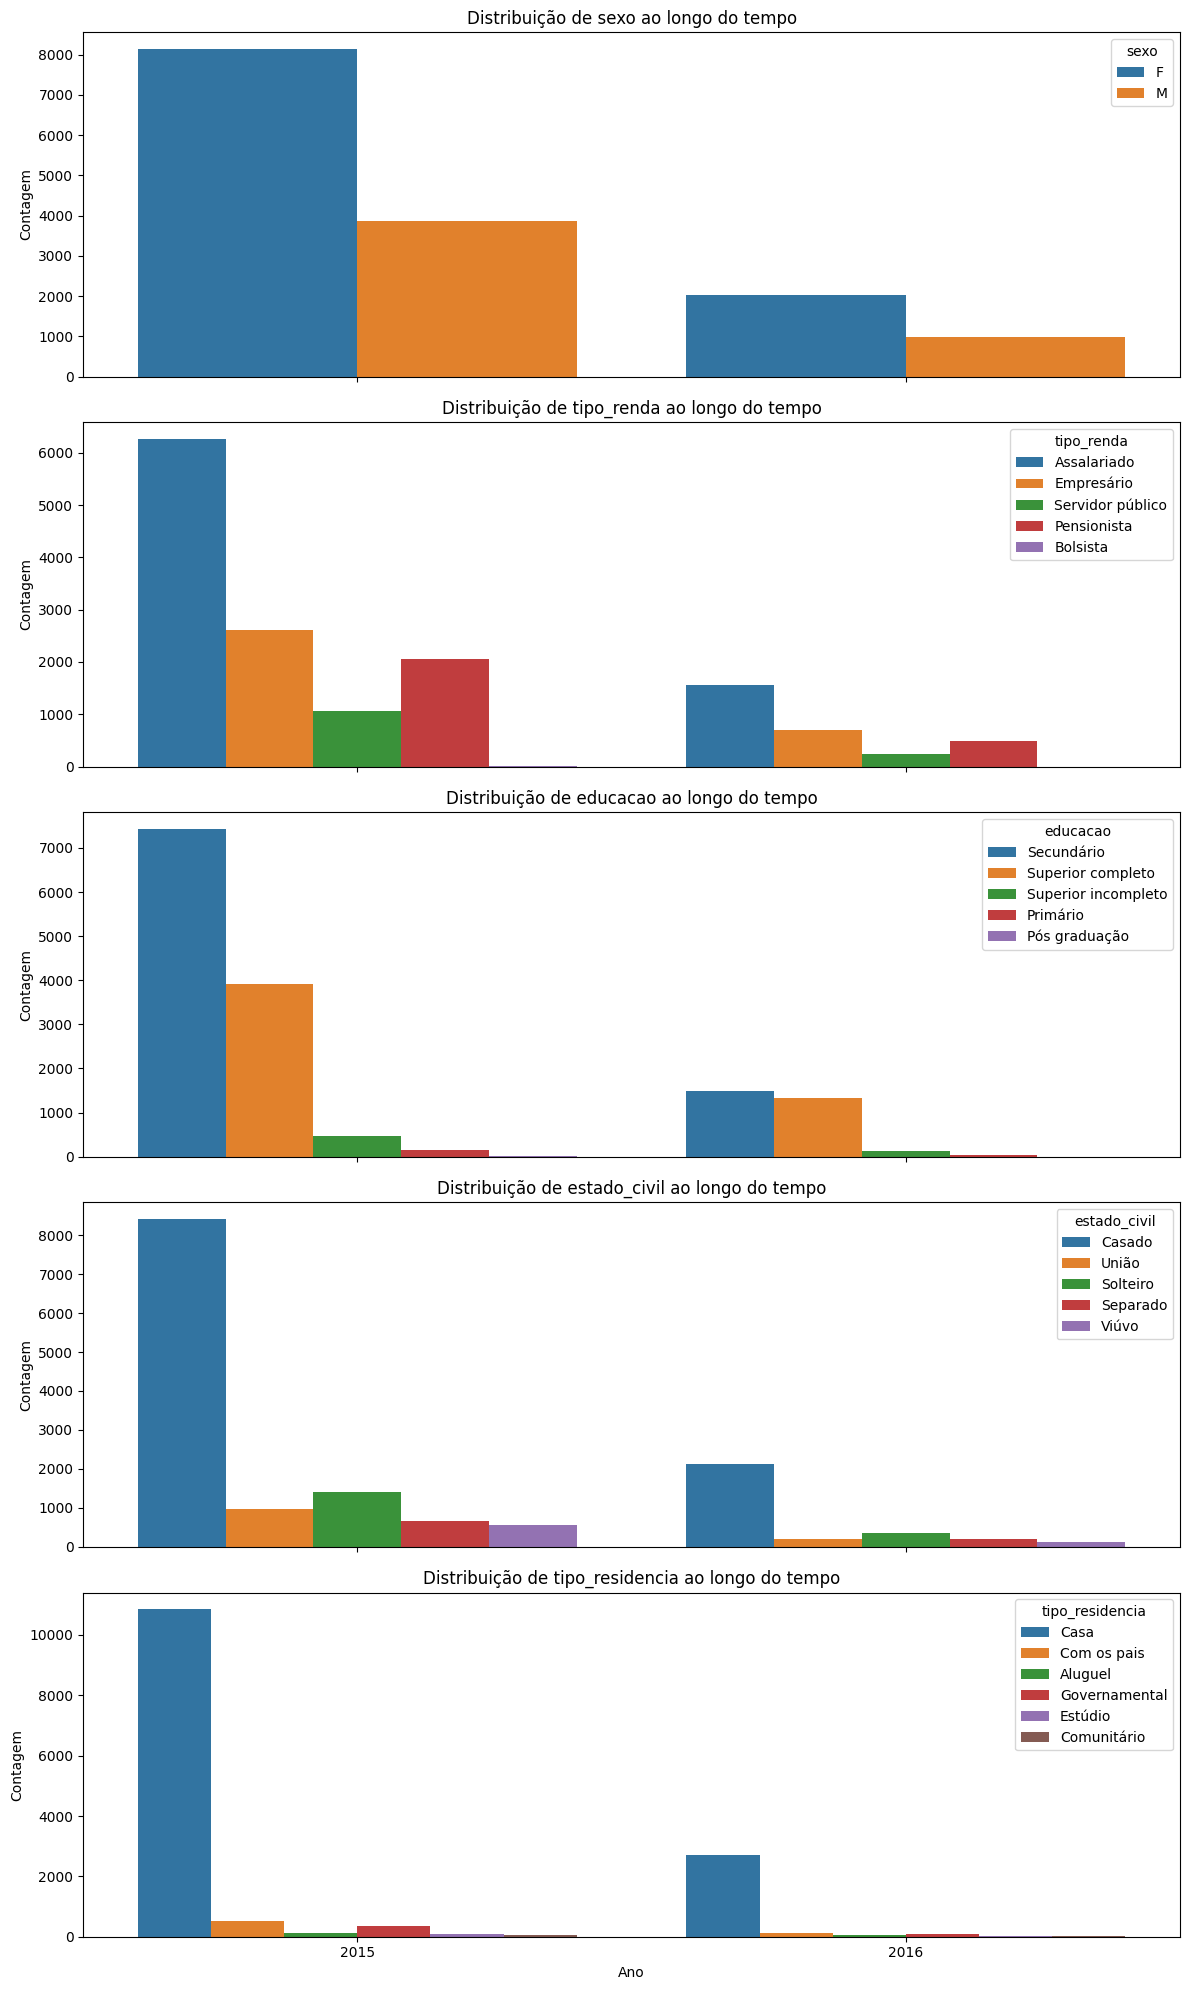

In [22]:
# Converter a coluna 'data_ref' para datetime e extrair o ano
data['data_ref'] = pd.to_datetime(data['data_ref'])
data['year'] = data['data_ref'].dt.year

# Selecionar variáveis qualitativas
qualitative_columns = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Criar subplots
fig, axes = plt.subplots(len(qualitative_columns), 1, figsize=(12, 20), sharex=True)

# Plotar cada variável qualitativa ao longo dos anos
for i, col in enumerate(qualitative_columns):
    sns.countplot(data=data, x='year', hue=col, ax=axes[i])
    axes[i].set_title(f'Distribuição de {col} ao longo do tempo')
    axes[i].set_ylabel('Contagem')
    axes[i].legend(title=col)

plt.xlabel('Ano')
plt.tight_layout()
plt.show()


**Sexo:**
A distribuição entre diferentes gêneros parece permanecer relativamente constante ao longo do tempo, indicando pouca ou nenhuma variação significativa na composição de gêneros da população ao longo dos anos.

**Tipo de Renda:**
Observamos que algumas categorias de renda apresentam variações ao longo do tempo. Isso pode indicar mudanças na composição da população em termos de renda, sugerindo alterações econômicas ou mudanças nas fontes de renda predominantes entre os indivíduos.

**Educação:**
Se houver flutuações notáveis em determinadas categorias de educação ao longo do tempo, isso pode sugerir uma mudança nas características educacionais da população. Essas flutuações podem refletir tendências em políticas educacionais, acesso à educação ou mudanças nas preferências de formação educacional.

**Estado Civil e Tipo de Residência:**
Variações nas proporções dessas categorias ao longo do tempo podem indicar tendências demográficas ou sociais. Por exemplo, um aumento na proporção de pessoas casadas pode refletir mudanças culturais, enquanto variações no tipo de residência podem indicar mudanças nas preferências de moradia ou no desenvolvimento urbano e rural.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

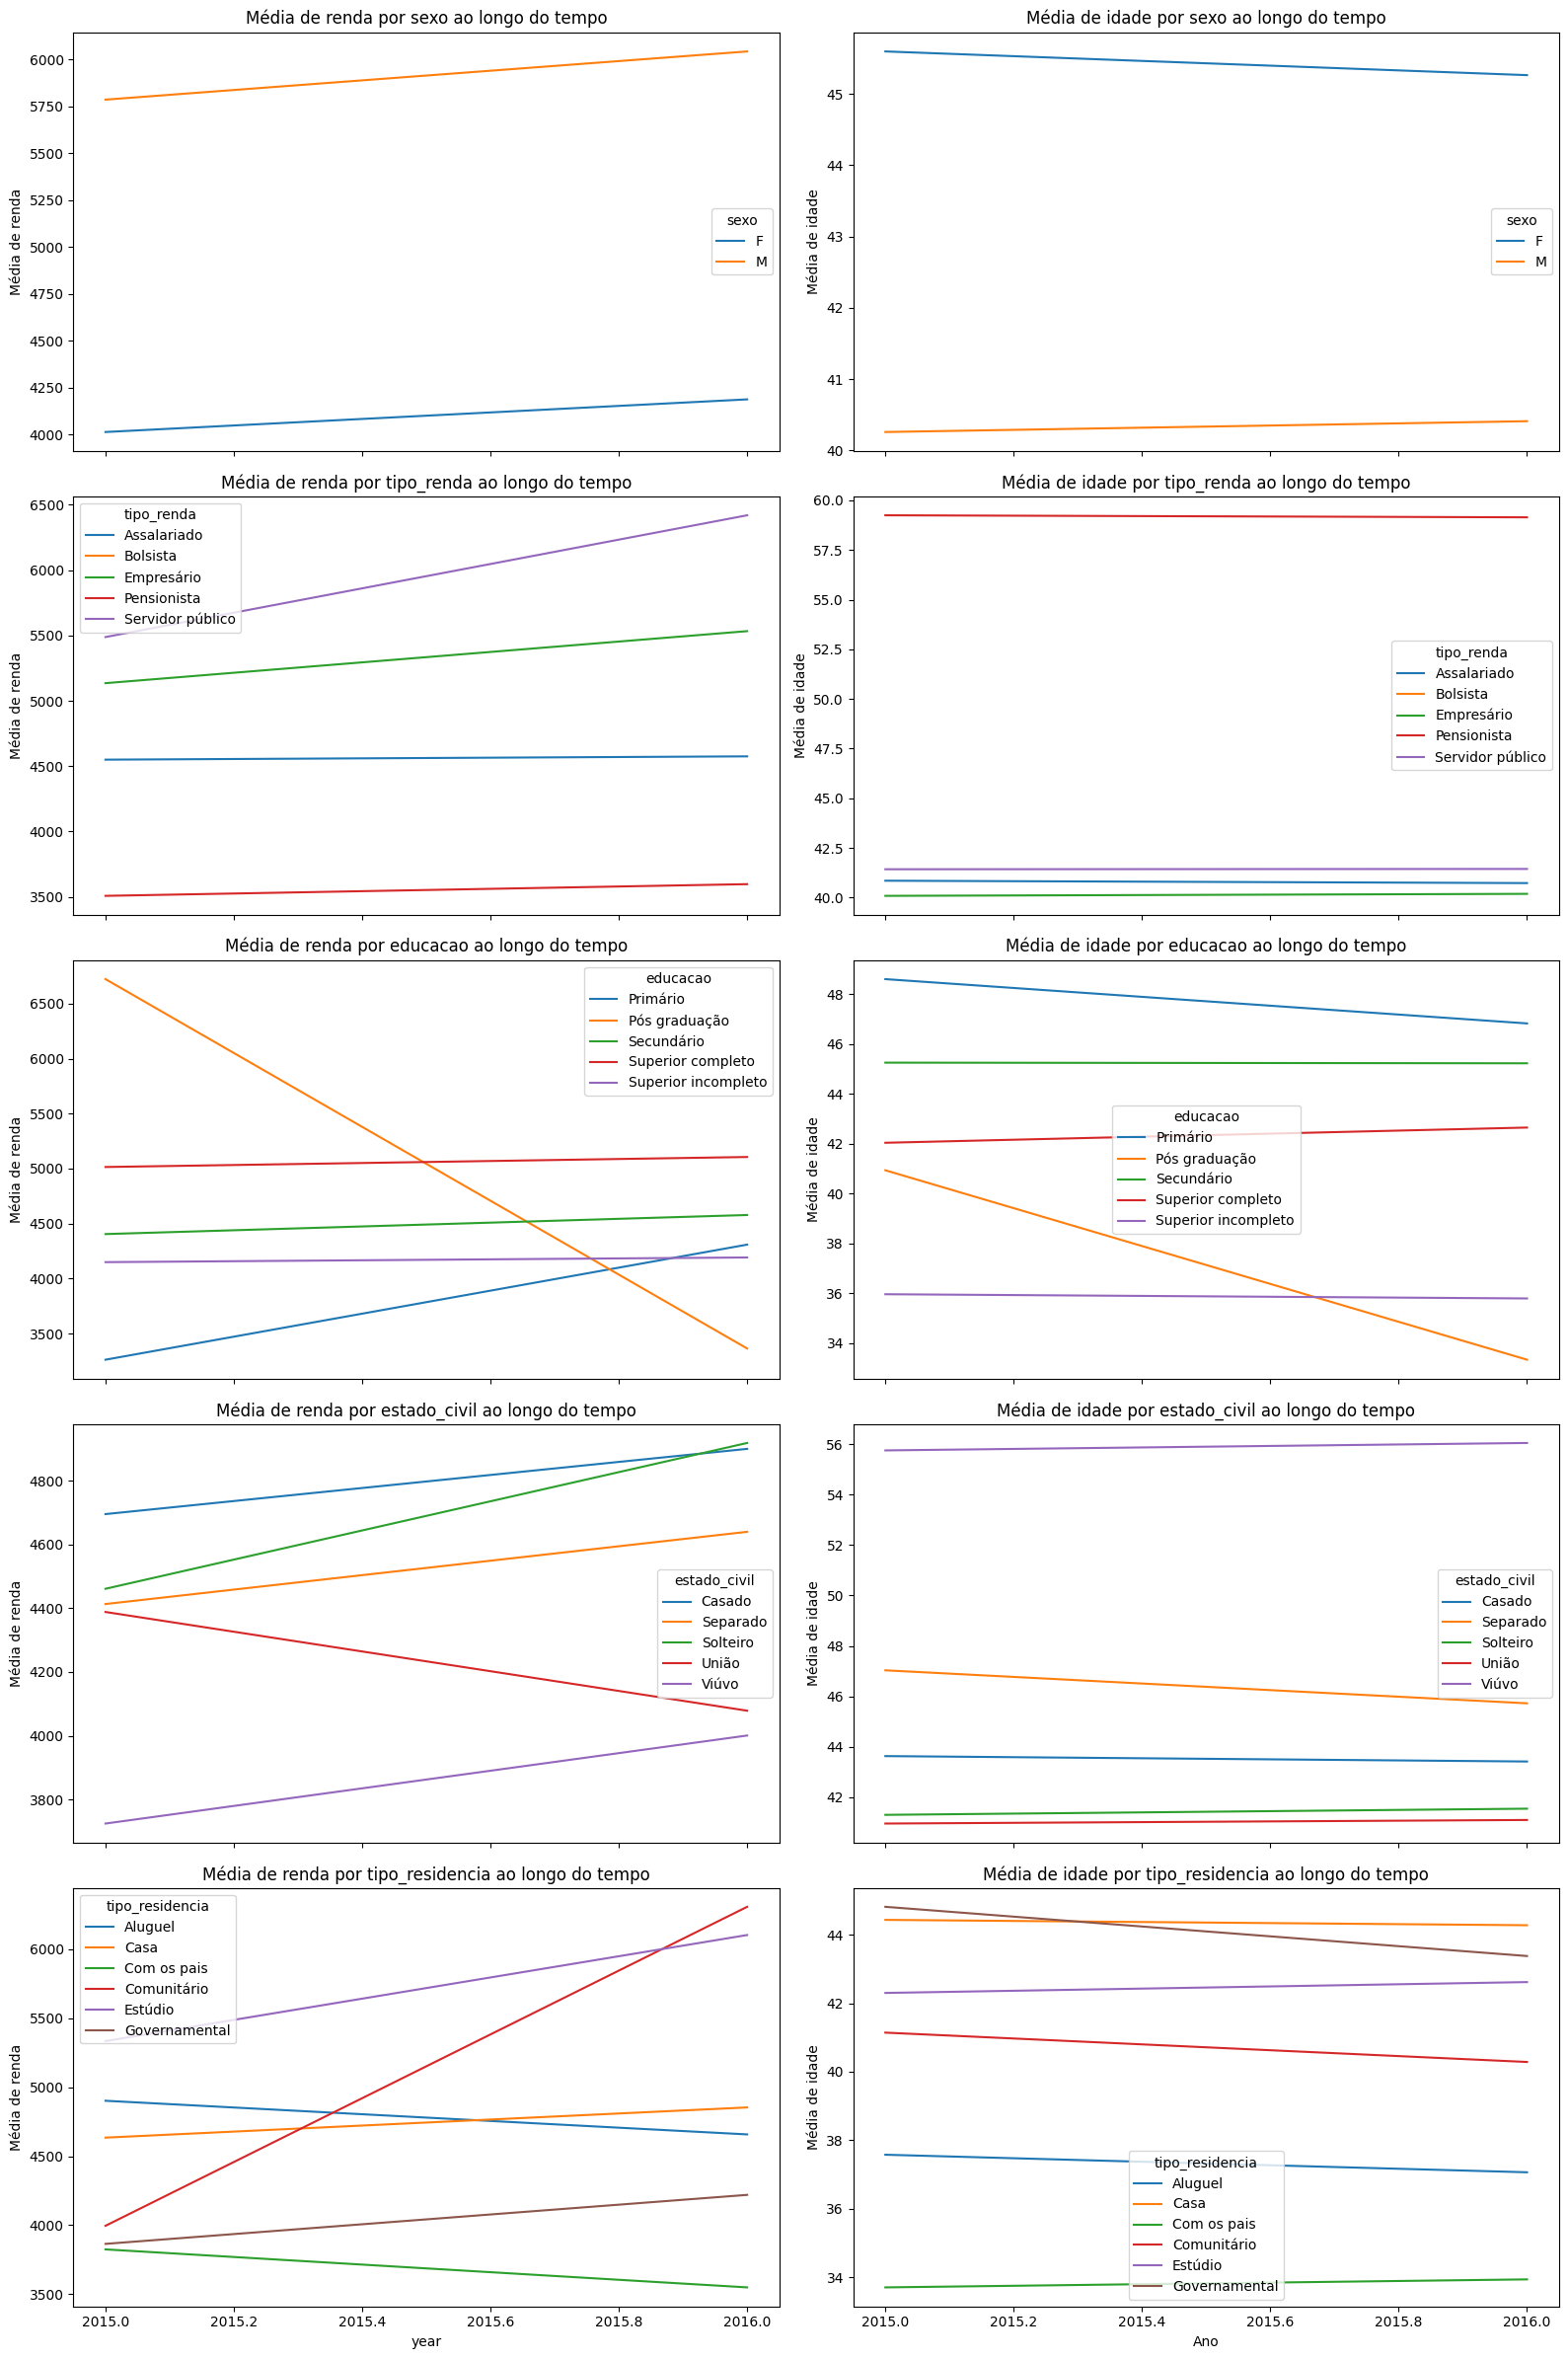

In [25]:
# Definir variáveis qualitativas e quantitativas
qualitative_columns = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
quantitative_columns = ['renda', 'idade']

# Configurar subplots
fig, axes = plt.subplots(len(qualitative_columns), len(quantitative_columns), figsize=(16, 24), sharex=True)

# Loop para criar gráficos para cada combinação de variável qualitativa e quantitativa
for i, qual_col in enumerate(qualitative_columns):
    for j, quant_col in enumerate(quantitative_columns):
        # Calcular a média de 'quant_col' para cada nível de 'qual_col' ao longo dos anos
        avg_data = data.groupby(['year', qual_col])[quant_col].mean().reset_index()
        sns.lineplot(data=avg_data, x='year', y=quant_col, hue=qual_col, ax=axes[i][j])
        axes[i][j].set_title(f'Média de {quant_col} por {qual_col} ao longo do tempo')
        axes[i][j].set_ylabel(f'Média de {quant_col}')
        axes[i][j].legend(title=qual_col)

plt.xlabel('Ano')
plt.tight_layout()
plt.show()


**Estabilidade Geral**
Variáveis como sexo e estado civil mostram médias relativamente constantes para renda e idade. Essa estabilidade é vantajosa para modelagem, pois indica que as relações entre essas variáveis e os indicadores quantitativos são consistentes ao longo do tempo.

**Variações Importantes**
Variáveis como tipo de renda e educação exibem algumas flutuações nas médias de renda. Por exemplo:

Certas categorias de **tipo de renda** apresentam variações nas médias de renda, sugerindo que mudanças econômicas ou sociais influenciaram as características de renda desses grupos.

**Educação** também mostra oscilações na média de idade e renda, possivelmente devido a mudanças demográficas ou níveis educacionais crescentes na população.

Essas variações são importantes para modelagem, pois podem indicar alterações no comportamento ou perfil dos clientes. Se não tratadas, podem impactar a precisão do modelo ao longo do tempo.

Usabilidade na Modelagem
Variáveis como sexo e estado civil parecem boas candidatas, pois mantêm** estabilidade **em suas médias e podem oferecer informações preditivas consistentes. Já tipo de renda e educação podem ser úteis, mas demandam atenção. Suas variações ao longo do tempo sugerem que, para modelos preditivos, pode ser necessário monitorar essas variáveis para identificar mudanças estruturais nos perfis.

Conclusão
As variáveis qualitativas são, em geral, úteis para modelagem. No entanto, é recomendável tratar ou monitorar aquelas com variações mais marcantes para garantir que eventuais mudanças ao longo do tempo não prejudiquem a estabilidade do modelo.

Essa abordagem ajudará a manter a precisão e a relevância dos modelos preditivos ao longo do tempo, adaptando-se às mudanças e às novas tendências.